In [1]:
# Author: Alexander Maksiaev
# Purpose: Analyze results from sentiment analysis

In [2]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import docx

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)

sns.set_palette("viridis")

In [3]:
# Getting the data frame

results_clean = []
df = pd.read_csv("chatgpt_sentiments_transgender_03_13_2024_official.csv", low_memory=False)

print(df)

                              Textbook     Score
0    Abn_Barlow_04_Transgender_v2.docx  0.282339
1    Abn_Barlow_05_Transgender_v2.docx -0.049555
2    Abn_Barlow_06_Transgender_v2.docx -0.045714
3    Abn_Barlow_07_Transgender_v2.docx -0.783257
4       Abn_Barlow_08_Transgender.docx -0.575150
..                                 ...       ...
233  Spcl_Turnbull_05_Transgender.docx  0.699332
234  Spcl_Turnbull_06_Transgender.docx  0.299920
235  Spcl_Turnbull_07_Transgender.docx  1.783153
236  Spcl_Turnbull_08_Transgender.docx  1.924680
237    Spcl_Vaughn_07_Transgender.docx  1.420445

[238 rows x 2 columns]


                                   Textbook     Score          Author  Field
0         Abn_Barlow_04_Transgender_v2.docx  0.282339          Barlow    Abn
1         Abn_Barlow_05_Transgender_v2.docx -0.049555          Barlow    Abn
2         Abn_Barlow_06_Transgender_v2.docx -0.045714          Barlow    Abn
3         Abn_Barlow_07_Transgender_v2.docx -0.783257          Barlow    Abn
4            Abn_Barlow_08_Transgender.docx -0.575150          Barlow    Abn
5             Abn_Brown_05_Transgender.docx -3.737500           Brown    Abn
6          Abn_Comer_05_Transgender_v2.docx -0.733708           Comer    Abn
7             Abn_Comer_06_Transgender.docx -0.686602           Comer    Abn
8             Abn_Comer_07_Transgender.docx  0.734033           Comer    Abn
9          Abn_Comer_08_Transgender_v2.docx  0.419571           Comer    Abn
10            Abn_Comer_09_Transgender.docx  0.056307           Comer    Abn
11           Abn_Hooley_13_Transgender.docx -1.198174          Hooley    Abn

Text(0.5, 1.0, 'Scores by Field')

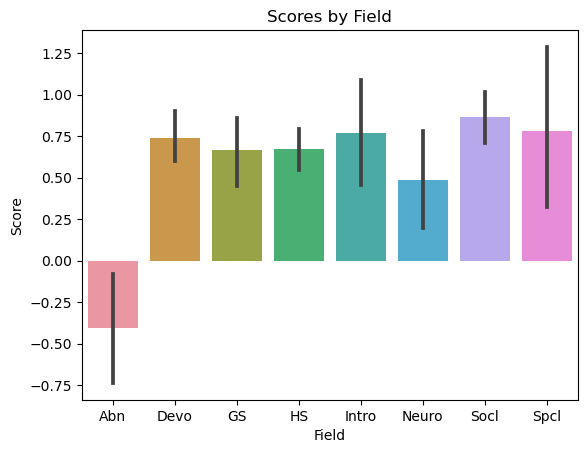

In [4]:
# Field Analysis

# Break up the data frame into fields

field_df = df

all_fields = []

fields_regex = ["Abn.*", "Devo.*", "Intro.*", "Neuro.*", "Socl.*", "Spcl.*", "GS.*", "HS.*"]

authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Abn_Nevid", "Nolen-Hoeksema", "Sue", 
                 "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Devo_Newman", "Santrock", 
                 "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
                 "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
                 "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
                 "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn", 
                 "GS_Newman", "Rothenberg", "Wood", "Carroll", "Crooks", "Hyde", "LeVay", "Yarber", "Gonzalez-Mena", "Andersen",
                  "Brannon", "Healey", "Helgeson", "Kimmel", "Robinson", "Greenberg", "Hock", "Intro_Nevid", "Haines", "Franzoi",
                  "Kassin"]


for field in fields_regex:
    field_l = field_df[field_df["Textbook"].str.contains(field, regex=True)]
    all_fields.append(field_l)
    

# Find average score per field

field_means = []
field_names = []
author_names = []
                
for textbook in range(len(field_df)):
    if len(field_df[field_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
        chunk = field_df["Textbook"].iloc[textbook]
        field = chunk.split("_")[0]
        author = chunk.split("_")[1]
        field_names.append(field)
        author_names.append(author)
    
field_df["Author"] = author_names
field_df["Field"] = field_names

fig, ax = plt.subplots()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(field_df)
    
sns.barplot(ax = ax,
    data=field_df, x="Field", y="Score"
)
# ax.errorbar(mean.index, mean)
ax.set_title("Scores by Field")
# plt.savefig('fields_transgender_chatgpt.png')

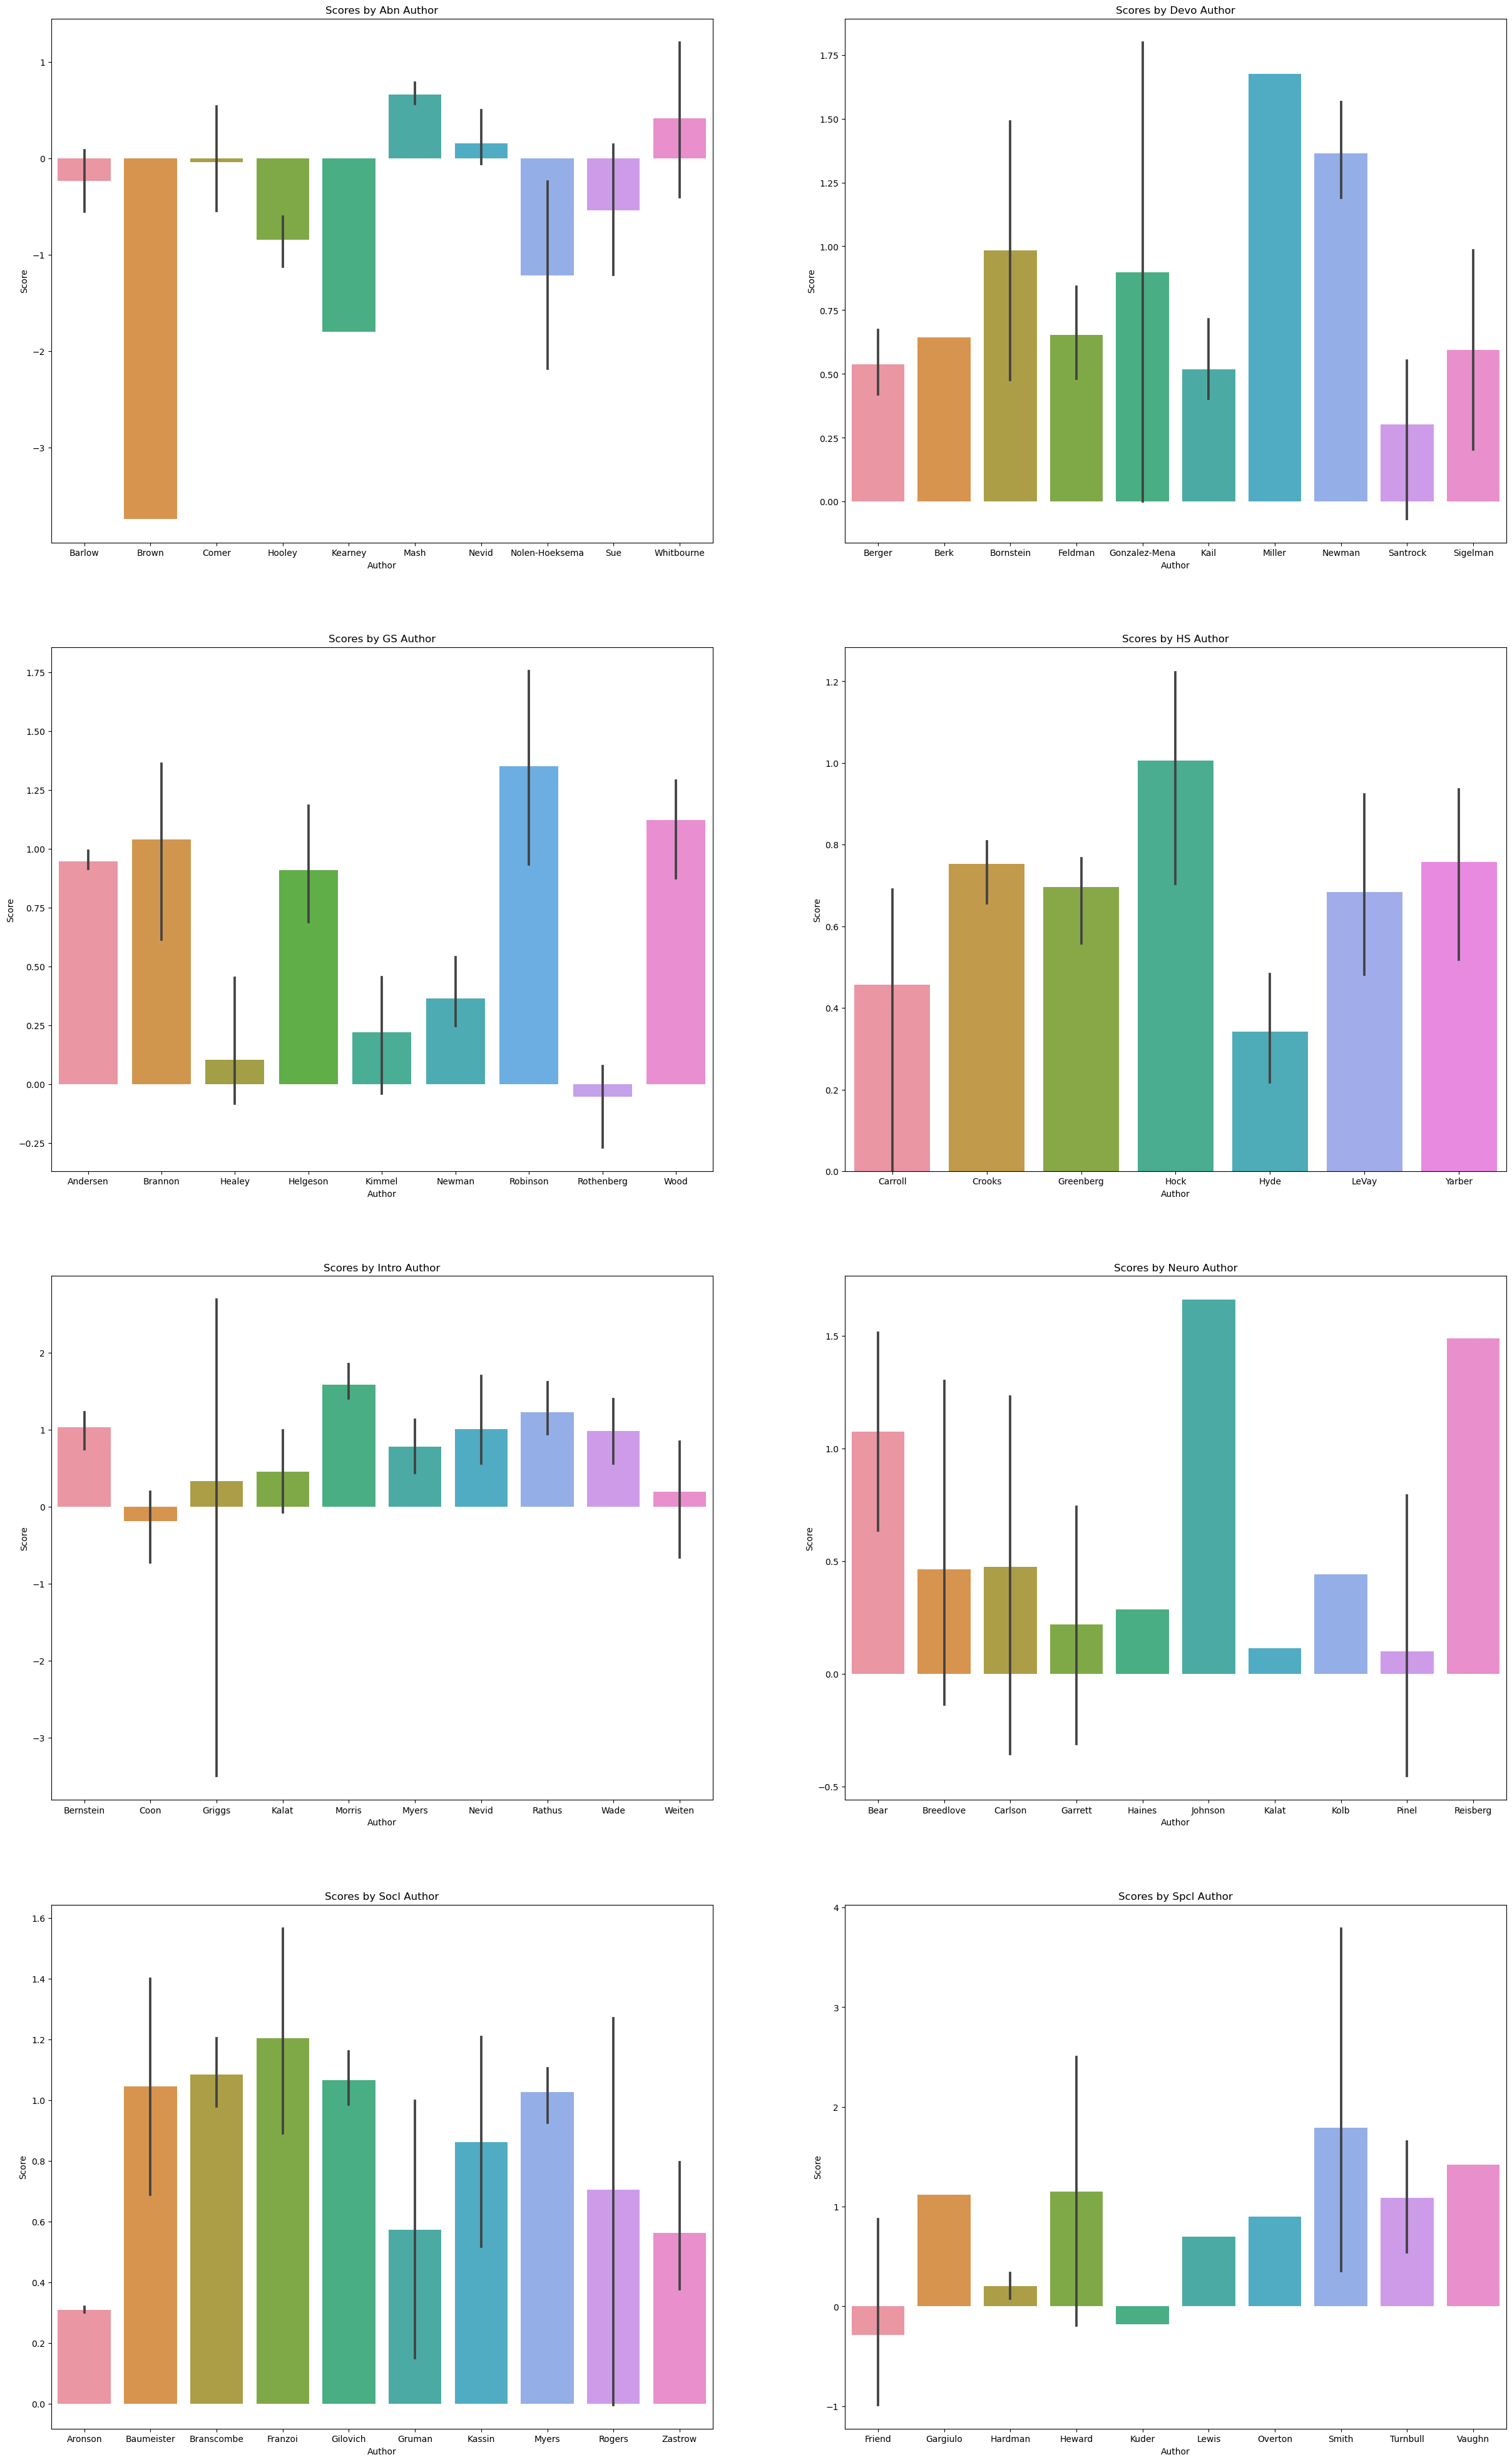

In [5]:
# Author Analysis

# Break up dataframe into authors

author_df = field_df

all_authors = []

for author in authors:
    author_l = author_df[author_df["Textbook"].str.contains(author)]
    all_authors.append(author_l)

author_means_df = author_df

fig, ax = plt.subplots(4, 2, figsize = (30,50))

sns.barplot(ax = ax[0][0],
    data=author_means_df.loc[author_means_df['Field']=='Abn'], x="Author", y="Score"
)
sns.barplot(ax = ax[0][1],
    data=author_means_df.loc[author_means_df['Field']=='Devo'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][0],
    data=author_means_df.loc[author_means_df['Field']=='GS'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][1],
    data=author_means_df.loc[author_means_df['Field']=='HS'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][0],
    data=author_means_df.loc[author_means_df['Field']=='Intro'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][1],
    data=author_means_df.loc[author_means_df['Field']=='Neuro'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][0],
    data=author_means_df.loc[author_means_df['Field']=='Socl'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][1],
    data=author_means_df.loc[author_means_df['Field']=='Spcl'], x="Author", y="Score"
)

ax[0][0].set_title("Scores by Abn Author")
ax[0][1].set_title("Scores by Devo Author")
ax[1][0].set_title("Scores by GS Author")
ax[1][1].set_title("Scores by HS Author")

ax[2][0].set_title("Scores by Intro Author")
ax[2][1].set_title("Scores by Neuro Author")
ax[3][0].set_title("Scores by Socl Author")
ax[3][1].set_title("Scores by Spcl Author")

# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "authors_transgender_" + str(counter) + "_" + str(subcounter) + "_chatgpt.png"
#         ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.2))
    counter += 1


C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:19

['04', '05', '06', '07', '08', '05', '05', '06', '07', '08', '09', '13', '14', '15', '16', '17', '06', '02', '05', '06', '08', '09', '10', '03', '04', '05', '06', '07', '07', '08', '09', '10', '11', '04', '05', '06', '07', '08', '05', '06', '07', '08', '09', '10', '08', '02', '04', '05', '07', '03', '04', '05', '06', '07', '08', '02', '05', '06', '07', '06', '08', '09', '10', '11', '12', '13', '11', '12', '13', '14', '15', '16', '05', '07', '08', '09', '06', '07', '08', '09', '10', '10', '11', '12', '13', '14', '01', '04', '05', '08', '11', '07', '09', '10', '11', '07', '08', '09', '10', '11', '01', '02', '03', '04', '05', '08', '09', '11', '12', '07', '08', '09', '10', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '02', '03', '04', '05', '04', '12', '07', '07', '08', '09', '10', '06', '08', '09', '02', '04', '12', '13', '14', '02', '03', '04', '02', '03', '10', '11', '12', '02', '03', '04', '08', '09', '10', '02', '03', '04', '05', '06', '10', '12', '10', '11', '05', '09

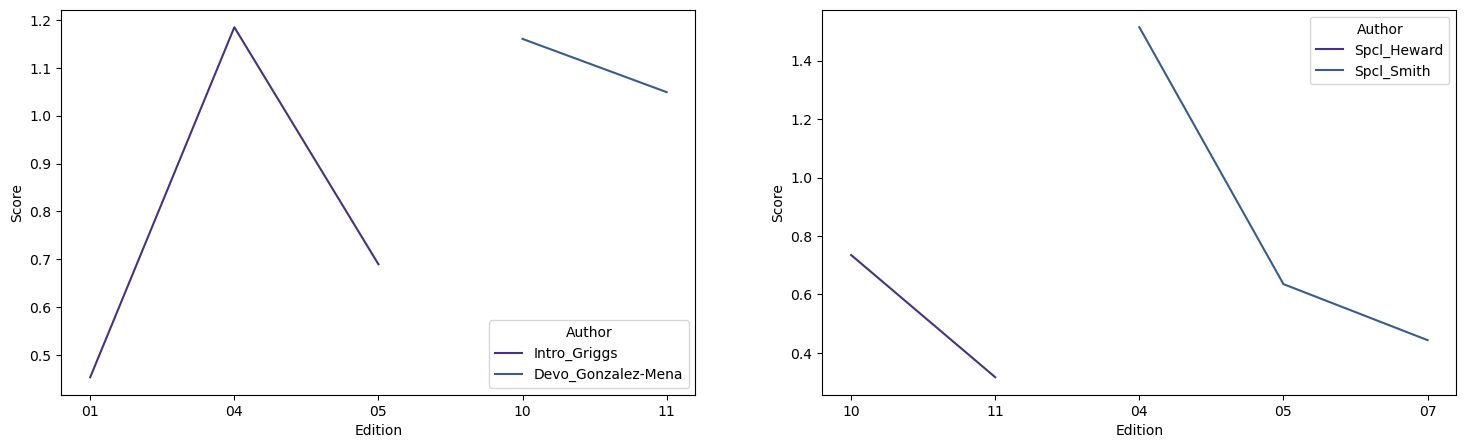

In [15]:
# Edition Analysis

edition_df = df


# Cut up dataframe into chunks by author

all_editions = []
author_total = []
test = []
slope = []
for a_df in all_authors:
    author_name = ""
    alphabetical = a_df["Textbook"].str.split("_").values 
    editions = [] # Get only the edition
    for l in alphabetical:
        editions.append(l[2])
        all_editions.append(l[2])
        author_name = l[0] + "_" + l[1]
        author_total.append(author_name)
    test.append(editions)
    a_df.loc[:,"Edition"] = editions
    a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
    a_df = a_df.sort_values("Edition")
    if len(a_df["Edition"]) > 0:
        res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
        for l in alphabetical:
            if len(alphabetical) > 1:
                slope.append(res.slope)
            else:
                slope.append(0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(all_editions)
                
edition_df["Edition"] = all_editions
edition_df["Author"] = author_total
edition_df["Slope"] = slope



fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

high = edition_df[edition_df["Slope"] > 1]
sns.lineplot(ax = axes[0], x="Edition", y="Score", hue="Author", data=high)

low = edition_df[edition_df["Slope"] <= -1]
sns.lineplot(ax = axes[1], x="Edition", y="Score", hue="Author", data=low)

plt.show()


      Year     Score
1988  1988  0.637290
1997  1997  0.933866
1999  1999  0.354570
2000  2000  0.534619
2001  2001  0.783589
2002  2002  0.385299
2003  2003  0.236318
2004  2004  0.541201
2005  2005  0.156394
2006  2006  0.195465
2007  2007  0.591467
2008  2008  0.341993
2009  2009  0.634334
2010  2010  0.310998
2011  2011  0.822650
2012  2012  0.737920
2013  2013  0.169495
2014  2014  0.621344
2015  2015  0.813861
2016  2016  0.788750
2017  2017  0.324553
2018  2018  0.909964


Text(0.5, 1.0, 'Mean Textbook Score Throughout Years')

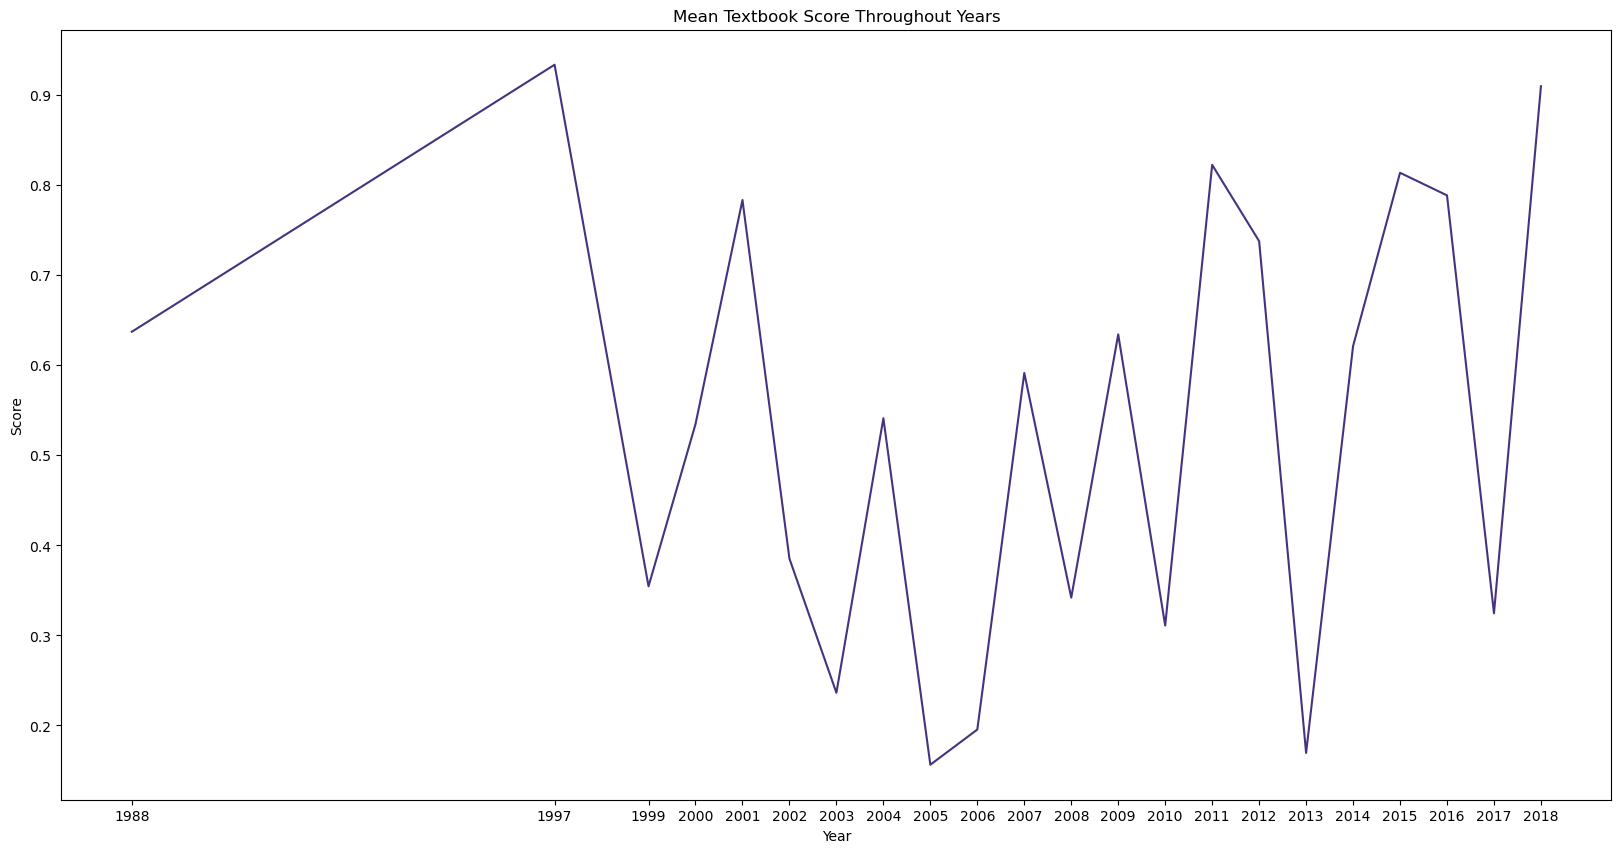

In [7]:
# Year Analysis

year_df = df

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Transgender"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year

# Overall mean for each year, for all textbooks

# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books
    
# Find mean of the books in each year
year_scores = {}
for year in year_textbooks:
    book_list = year_textbooks[year]
    scores = []
    for book in book_list:
        # Find the book in the df
        string_to_query = "Textbook=='" + book + "'"
        score = year_df.query(string_to_query)["Score"]
        scores.append(float(score.iloc[0]))
    average = mean(scores)
    year_scores[year] = [year, average]

# Graph it

graphing_years = pd.DataFrame.from_dict(year_scores, orient="index", columns=["Year", "Score"])
# graphing_years = graphing_years.reset_index()

print(graphing_years)

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(20, 10)) 

sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
ax.set_xticks(graphing_years["Year"])
ax.set_title("Mean Textbook Score Throughout Years")
# plt.savefig('years_transgender_chatgpt.png')

In [8]:
# # Does length of passage matter?

# os.chdir(textbook_dir)

# # Function to get full text
# def getText(filename):
#     doc = docx.Document(filename)
#     fullText = []
#     for para in doc.paragraphs:
#         fullText.append(para.text)
#     return fullText

# # Dictionary filled with text for all the books, minus the titles
# title_text = {}
# for book in textbooks:
#     total_text = getText(book)
#     text_without_title = total_text[4:]
#     for piece in text_without_title:
#         if piece == '':
#             text_without_title.remove(piece) # Does not get rid of all whitespace, but ah well.
# #     text_without_title.remove('')
#     title_text[book] = text_without_title
    
    
# # Remove stop words from each book

# stopwords_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Stop_Words" 

# os.chdir(stopwords_dir)

# f = open("stop_words_english_original.txt", "r", encoding="utf-8")
# stopwords = []
# for text in f:
#     text = text.replace('\n', '')
#     stopwords.append(text)


# punc = '''!()[]{};:'-"\,<>./?@#$%^&*_~''' # Must include "-" in words... or not?

# # Function to clean up text and remove stopwords
# def clean(book):
#     text_list = title_text[book]
#     new_text_list = []
    
#     # Clean up text
#     for text in text_list:
#         text = text.strip()
#         text = text.lower()
#         text = text.split(' ')
#         new_text_list.append(text)


#     newer_text_list = []
    
#     # Remove punctuation
#     for sentence in new_text_list:
#         for word in sentence:
#             for char in punc:
#                 if char in word:
#                     word = word.replace(char, '')
#             newer_text_list.append(word)
                
#     # Remove stop words
#     newest_text_list = []
#     for words in newer_text_list:
#         if words not in stopwords:
#             newest_text_list.append(words)

#     # Remove blanks
#     for w in newest_text_list:
#         if len(w) == 0:
#             newest_text_list.remove(w)
            
#     return newest_text_list

# # Update all the books with their clean, stopword-less counterparts

# clean_texts = {}
# for book in title_text:
#     newest_text_list = clean(book)
#     clean_texts[book] = newest_text_list
    
# # Find length of all texts
# lengths = {}
# for book in clean_texts:
#     length_of_text = len(clean_texts[book])
#     lengths[book] = length_of_text
    
# print(lengths)

In [9]:
# print(max(lengths.values()))

In [10]:
# df["Field"] = df["Author"].apply(lambda x : x.split("_")[0])

In [11]:
# length_df = df
# print(length_df)

# # Add the lengths of the books to the dataframe
# length_df["Length"] = length_df["Textbook"].map(lengths)

# print(length_df[length_df["Length"] > 4000])

In [12]:


# # Correlation between score and length?
# fig, ax = plt.subplots(1, 2, figsize=(15, 8)) 

# sns.scatterplot(ax=ax[0], data=length_df, x="Length", y="Score", hue="Field")
# ax[0].set_title("Length of Textbook vs. Score")

# # Remove special education and abnormal
# secondary_df = length_df[length_df["Field"] != "Spcl"]
# tertiary_df = secondary_df[secondary_df["Field"] != "Abn"]
# sns.scatterplot(ax=ax[1], data=tertiary_df, x="Length", y="Score", hue="Field")
# ax[1].set_title("Length of Textbook vs. Score (Excluding Special Ed. and Abnormal)")

In [13]:
# # What about raw scores and length?
# os.chdir(results_dir)

# raw_df = pd.read_csv("raw_sentiments_01_04_2024.csv", low_memory=False)

# print(raw_df)

# raw_df["Length"] = length_df["Length"]
# raw_df["Field"] = length_df["Field"]

# # length_df2 = length_df

# # # Add the lengths of the books to the dataframe
# # length_df2["Raw_Score"] = raw_df["Raw_Score"].map(books)

# # print(length_df2)

# # Correlation between score and length?
# fig, ax = plt.subplots(1, 2, figsize=(15, 4)) 

# sns.scatterplot(ax=ax[0], data=raw_df, x="Length", y="Raw_Score", hue="Field")
# ax[0].set_title("Length of Textbook vs. Raw Score")

# # Remove special education and abnormal
# secondary_df2 = raw_df[raw_df["Field"] != "Spcl"]
# tertiary_df2 = secondary_df2[secondary_df2["Field"] != "Abn"]
# sns.scatterplot(ax=ax[1], data=tertiary_df2, x="Length", y="Raw_Score", hue="Field")
# ax[1].set_title("Length of Textbook vs. Raw Score (Excluding Special Ed. and Abnormal)")

In [14]:
# # Overall

# overall_df = df

# overall_df["Year"] = overall_df["Textbook"].map(book_years)

# fields = []
# for author in overall_df["Author"]:
#     field = author.split("_")[0]
#     fields.append(field)

# overall_df["Field"] = fields

# print(overall_df)

# fig, ax = plt.subplots(figsize=(20,20))

# sns.scatterplot(data=overall_df, x="Year", y="Score", hue="Field")